In [22]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import yfinance as yf
import matplotlib.pyplot as plt

In [23]:
# Function to create sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i])
        y.append(data[i, 0]) 
    return np.array(x), np.array(y)


In [24]:
# Load data by taking input from user which stocks to predict
def load_data(stock):
    # Keep the dates from 2020-01-01 to today's date
    start_date = '2020-01-01'
    end_date = dt.datetime.now().strftime('%Y-%m-%d')
    data = yf.download(stock, start=start_date, end=end_date)
    return data

In [25]:
# Ask the user for stock symbol
stock = input("Enter the stock symbol to predict: ")

In [26]:
# Load and prepare the data
data = load_data(stock)
data = data[['Close', 'Volume', 'High', 'Low']]  # Selecting relevant features
data = data.dropna()  # Drop any rows with missing values

[*********************100%%**********************]  1 of 1 completed


In [27]:
# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
data_scaled = sc.fit_transform(data)

In [28]:
# Create a data structure with 60 timesteps and 1 output
seq_length = 60
X_train, y_train = create_sequences(data_scaled, seq_length)

In [29]:
# Reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

In [30]:
# Initialize the RNN
regressor = Sequential()

# Add the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Add a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Add a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Add a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Add the output layer
regressor.add(Dense(units=1))

c:\Users\sivak\OneDrive\Documents\GitHub\Stock Price Prediction\new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
# Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
# Fit the RNN to the Training set
history = regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0757
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0080
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0078
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0061
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0072
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0066
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0056
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0060
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0055
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0056
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0053
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0050
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0058
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0058
Epoch 15/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - lo

In [33]:
# Getting the real stock price for the test set
start_test = dt.datetime(2020, 6, 26)
end_test = dt.datetime.now().strftime('%Y-%m-%d')
data_test = yf.download(stock, start=start_test, end=end_test)
data_test = data_test[['Close', 'Volume', 'High', 'Low']]
data_test = data_test.dropna()  # Drop any rows with missing values

[*********************100%%**********************]  1 of 1 completed


In [34]:
# Prepare test data
data_total = pd.concat((data, data_test), axis=0)
inputs = data_total[len(data_total) - len(data_test) - seq_length:].values
inputs = sc.transform(inputs)

c:\Users\sivak\OneDrive\Documents\GitHub\Stock Price Prediction\new_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [35]:
# Create test sequences
X_test = []
for i in range(seq_length, len(inputs)):
    X_test.append(inputs[i-seq_length:i])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

In [36]:
# Make predictions
predicted_stock_price = regressor.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [37]:
# Inverse transform the 'Close' feature
predicted_stock_price_close = sc.inverse_transform(np.concatenate((predicted_stock_price, inputs[seq_length:, 1:]), axis=1))[:, 0]

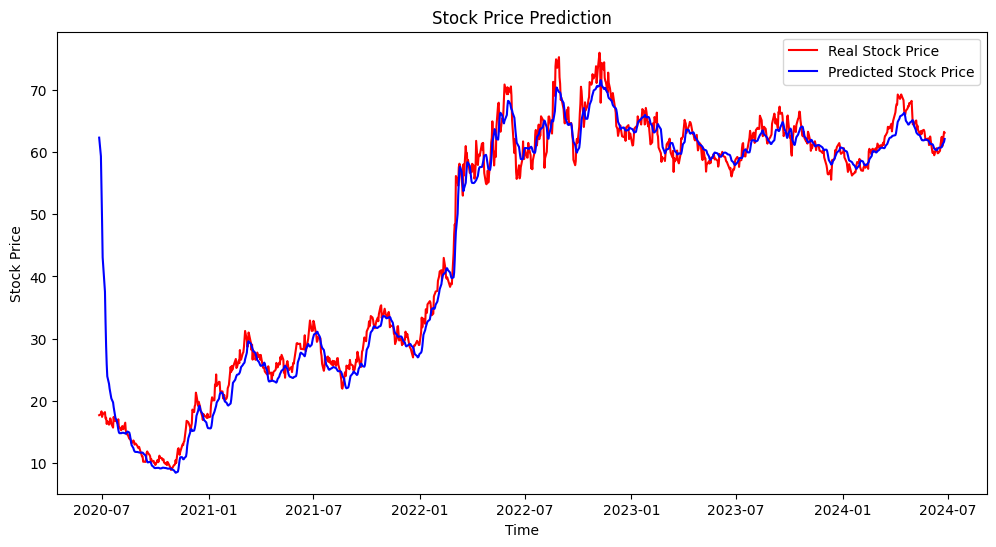

In [38]:
# Visualise the results
plt.figure(figsize=(12, 6))
plt.plot(data_test.index, data_test['Close'], color='red', label='Real Stock Price')
plt.plot(data_test.index, predicted_stock_price_close, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [39]:
# Evaluate the model accuracy and predictions
X_test_eval, y_test_eval = create_sequences(data_scaled[-(len(data_test) + seq_length):], seq_length)
X_test_eval = np.reshape(X_test_eval, (X_test_eval.shape[0], X_test_eval.shape[1], X_test_eval.shape[2]))
score = regressor.evaluate(X_test_eval, y_test_eval, verbose=0)
print('Prediction accuracy: {:.2f}%'.format(100 - score * 100))
print('Current stock price: $ {:.2f}'.format(data_test['Close'].values[-1]))
print('Predicted stock price for today: $ {:.2f}'.format(predicted_stock_price_close[-2]))
print('Predicted stock price for the next day: $ {:.2f}'.format(predicted_stock_price_close[-1]))

Prediction accuracy: 99.91%
Current stock price: $ 63.10
Predicted stock price for today: $ 61.65
Predicted stock price for the next day: $ 62.10


In [40]:
# Save the model as a keras model
regressor.save('stock_price_prediction.h5')
print('Model saved as stock_price_prediction.h5')

Model saved as stock_price_prediction.h5
